#### Import Dependencies

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import math
import os
import sys

In [68]:
# get the updated custom functions automatically
%load_ext autoreload
%autoreload 2

nb_dir = os.path.split(os.getcwd())[0]
nb_dir
print(nb_dir)

if nb_dir not in sys.path:
    print("Nb dir is not in system path")
    sys.path.append(nb_dir)
else:
    print("Nb dir is already in system path")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
d:\CodingHenry\quant\pyquant-research
Nb dir is already in system path


#### Formula
The RSI uses a two-part calculation that starts with the following formula.

The average gain or loss used in this calculation is the average percentage gain or loss during a look-back period. The formula uses a positive value for the average loss. Periods with price losses are counted as zero in the calculations of average gain. Periods with price increases are counted as zero in the calculations of average loss.

The standard number of periods used to calculate the initial RSI value is 14.

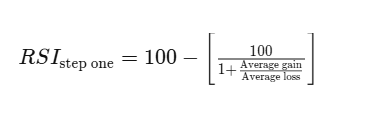

Once there are 14 periods of data available, the second calculation can be done. Its purpose is to smooth the results so that the RSI only nears 100 or zero in a strongly trending market

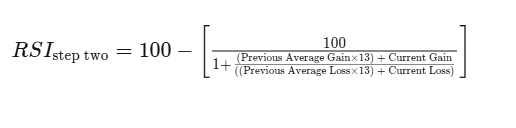

#### Get Data Series

In [ ]:
# get spy etf data
SYMBOL = "AAPL"

data = yf.Ticker(SYMBOL)
data = data.history(auto_adjust=False, period="3mo")
data = data.sort_index(ascending=True)
data

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2025-02-24 00:00:00-05:00,244.929993,248.860001,244.419998,247.100006,246.776398,51326400,0.0,0.0
2025-02-25 00:00:00-05:00,248.000000,250.000000,244.910004,247.039993,246.716461,48013300,0.0,0.0
2025-02-26 00:00:00-05:00,244.330002,244.979996,239.130005,240.360001,240.045212,44433600,0.0,0.0
2025-02-27 00:00:00-05:00,239.410004,242.460007,237.059998,237.300003,236.989227,41153600,0.0,0.0
2025-02-28 00:00:00-05:00,236.949997,242.089996,230.199997,241.839996,241.523270,56833400,0.0,0.0
...,...,...,...,...,...,...,...,...
2025-05-19 00:00:00-04:00,207.910004,209.479996,204.259995,208.779999,208.779999,46140500,0.0,0.0
2025-05-20 00:00:00-04:00,207.669998,208.470001,205.029999,206.860001,206.860001,42496600,0.0,0.0
2025-05-21 00:00:00-04:00,205.169998,207.039993,200.710007,202.089996,202.089996,59211800,0.0,0.0


#### Calculate RSI

In [ ]:
from utils.indicators import calculate_rsi_ema

rsi_values = calculate_rsi_ema(data)
rsi_values

Date
2025-02-24 00:00:00-05:00          NaN
2025-02-25 00:00:00-05:00          NaN
2025-02-26 00:00:00-05:00          NaN
2025-02-27 00:00:00-05:00          NaN
2025-02-28 00:00:00-05:00          NaN
                               ...    
2025-05-19 00:00:00-04:00    51.886277
2025-05-20 00:00:00-04:00    49.744096
2025-05-21 00:00:00-04:00    44.795925
2025-05-22 00:00:00-04:00    44.073379
2025-05-23 00:00:00-04:00    38.494945
Name: Close, Length: 64, dtype: float64

In [ ]:
import ta

# Calculate RSI and store it in a new column
rsi_ta = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi()
rsi_ta

Date
2025-02-24 00:00:00-05:00          NaN
2025-02-25 00:00:00-05:00          NaN
2025-02-26 00:00:00-05:00          NaN
2025-02-27 00:00:00-05:00          NaN
2025-02-28 00:00:00-05:00          NaN
                               ...    
2025-05-19 00:00:00-04:00    51.886277
2025-05-20 00:00:00-04:00    49.744096
2025-05-21 00:00:00-04:00    44.795925
2025-05-22 00:00:00-04:00    44.073379
2025-05-23 00:00:00-04:00    38.494945
Name: rsi, Length: 64, dtype: float64

#### Plotting RSI

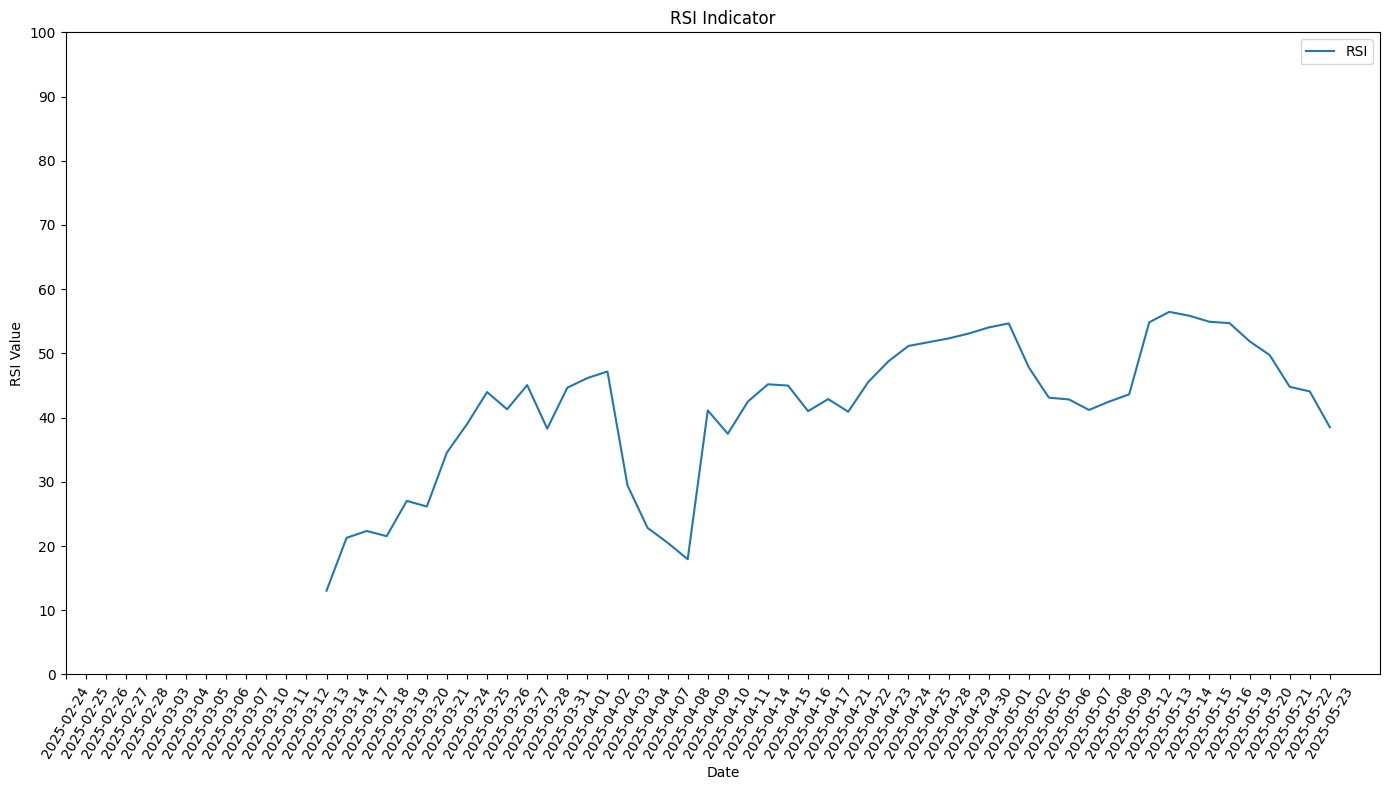

In [103]:
from utils.visualize import plot_RSI

plot_RSI(data=appl,
         rsi_values=rsi_values)

### Backtest

In [ ]:
from classes.Account import Account
from classes.Strategies import RSI_Strategy
from classes.Trade import Trade

# $10000
account_v0 = Account(balance=10000)
signal = RSI_Strategy.signal(data)
trade = Trade(symbol=SYMBOL,
              entry_time=data.iloc[signal.index + 1], # the next opening price after the signal
              ) if signal else None